# Algorithmic Trading Apple Stock Model

This program uses the dual moving average crossover to determine when to buy and sell stock. We will use Apple stock data published by Yahoo Finance (https://finance.yahoo.com/quote/AAPL/) over the last 4 years as our dataset.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#store the dataset
aapl = pd.read_csv('aapl.csv')

In [3]:
aapl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.202784,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.596279,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.134508,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.158121,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.275295,283192000
...,...,...,...,...,...,...,...
1217,2020-11-02,109.110001,110.680000,107.320000,108.769997,108.582664,122866900
1218,2020-11-03,109.660004,111.489998,108.730003,110.440002,110.249794,107624400
1219,2020-11-04,114.139999,115.589996,112.349998,114.949997,114.752022,138235500
1220,2020-11-05,117.949997,119.620003,116.870003,119.029999,118.824997,126387100


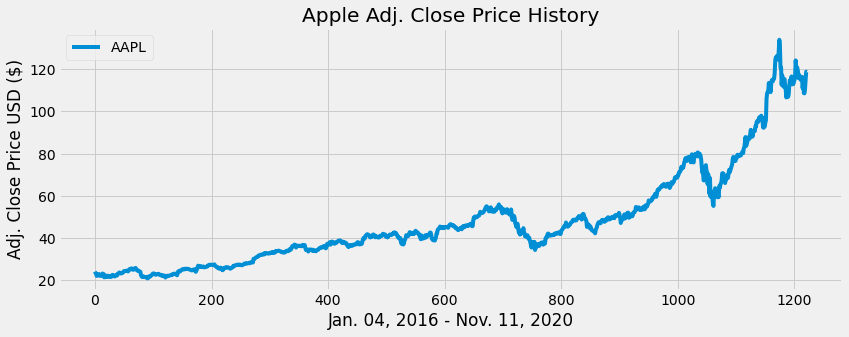

In [4]:
#Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(aapl['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Jan. 04, 2016 - Nov. 11, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [5]:
#Simple moving avg w/ 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = aapl['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1217,114.940034
1218,114.894446
1219,115.154996
1220,115.514709


In [6]:
#Simple moving avg w/ 100 day window
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = aapl['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1217,107.823373
1218,108.081852
1219,108.374914
1220,108.686062


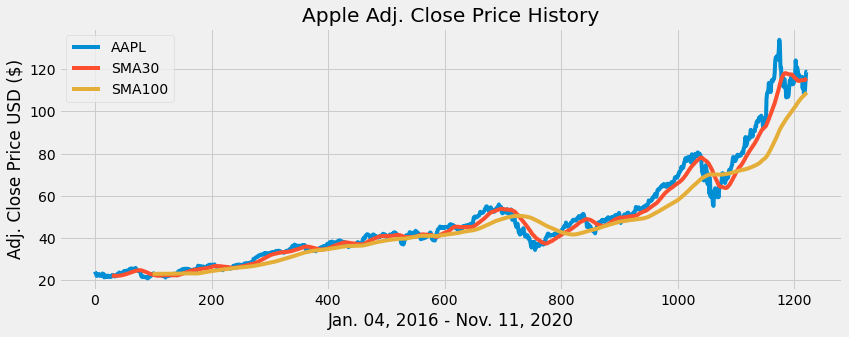

In [7]:
#Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(aapl['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Jan. 04, 2016 - Nov. 11, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [8]:
#New Data frame to store all data
data = pd.DataFrame()
data['aapl'] = aapl['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,aapl,SMA30,SMA100
0,24.202784,NaN,NaN
1,23.596279,NaN,NaN
2,23.134508,NaN,NaN
3,22.158121,NaN,NaN
4,22.275295,NaN,NaN
...,...,...,...
1217,108.582664,114.940034,107.823373
1218,110.249794,114.894446,108.081852
1219,114.752022,115.154996,108.374914
1220,118.824997,115.514709,108.686062


In [16]:
#Create a function to signal when to buy/sell stock
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['aapl'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['aapl'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
    return(sigPriceBuy, sigPriceSell)

In [17]:
#Store buy and sell data
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [18]:
#Show data
data

,aapl,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,24.202784,NaN,NaN,NaN,NaN
1,23.596279,NaN,NaN,NaN,NaN
2,23.134508,NaN,NaN,NaN,NaN
3,22.158121,NaN,NaN,NaN,NaN
4,22.275295,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1217,108.582664,114.940034,107.823373,NaN,NaN
1218,110.249794,114.894446,108.081852,NaN,NaN
1219,114.752022,115.154996,108.374914,NaN,NaN
1220,118.824997,115.514709,108.686062,NaN,NaN


<function matplotlib.pyplot.show(*args, **kw)>

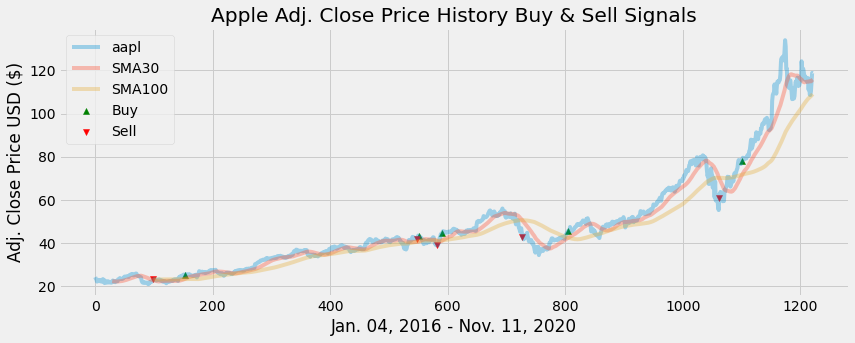

In [19]:
#Visualize data and strategy to buy/sell stock
plt.figure(figsize=(12.6, 4.6))
plt.plot(data['aapl'], label= 'aapl', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Jan. 04, 2016 - Nov. 11, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show

## Summary

After viewing our results, we can see this particular algorithmic trading stategy is not completely ideal for buying/selling Apple stock the past 4 years. Our model misses the ideal peaks to purchase at, specifically at the ~1050 mark along the x-axis. I will need to do more testing with this model on additional stocks before drawing a final conclusion.

In summary, this model would have returned a profit on Apple Stock over the past 4 years, but needs additional tuning before testing this method live.